In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
city_data = "Resources/city_data.csv"
ride_data = "Resources/ride_data.csv"

In [2]:
city_data = pd.read_csv("Resources/city_data.csv")
ride_data = pd.read_csv("Resources/ride_data.csv")
# city_data.shape

In [3]:
# Merging two dataset into a single dataset
combined_data = pd.merge(ride_data, city_data, on="city", how="left")
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


### Bubble plot of Ride Sharing Data

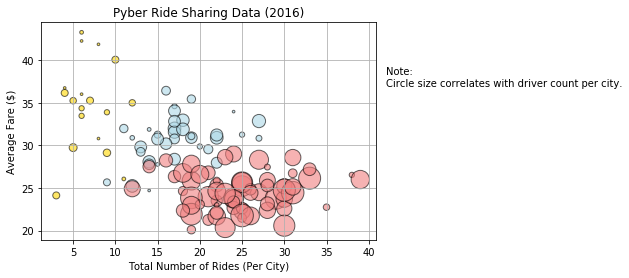

In [45]:
# Dataset groupded by type and city to get number of ride, average fare, and count of driver per city
grouped_data =combined_data.groupby(['type','city'])
ride_count = grouped_data['city'].value_counts()
city_fare = grouped_data['fare'].mean()
driver_count= grouped_data['driver_count'].mean()
#Dataframe created to assign the bubble color to the type of the city 
bubble_colors = pd.DataFrame({ "type": ["Rural", "Suburban","Urban"],
                                "color": ["gold","lightblue","lightcoral"]})
#Created dataframe of driver count and merged with bubble dataframe to assign the driver count bubble color in plot
driver_count = pd.DataFrame({"driver count" : driver_count})
driver_count_df = pd.merge(driver_count, bubble_colors, on='type', how='left')
plt.scatter(ride_count,city_fare, s=driver_count_df['driver count']*7, c=driver_count_df['color'],edgecolors='k',alpha=0.6)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(42,37, 'Note:\nCircle size correlates with driver count per city.')
# Legend
plt.grid()
plt.show()

### Total Fares by City Type

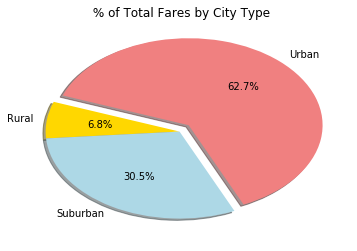

In [5]:
# Grouped data by  3 types of city to get the total fare and total ride by city type
grouped_type = combined_data.groupby('type')
total_fare = grouped_type['fare'].sum()
# percent_fare = round(total_fare*100/total_fare.sum(), 1)
labels = total_fare.index
colors =["gold", "lightblue","lightcoral"]
explode= (0, 0, 0.1)
plt.pie(total_fare, labels=labels, colors= colors,autopct='%0.1f%%', explode = explode, shadow= True, startangle=160 )
plt.title(" % of Total Fares by City Type")
plt.show()

### Total Rides by City Type

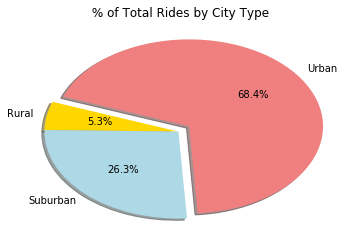

In [6]:
total_ride = grouped_type['type'].count()
plt.pie(total_ride, labels=labels, colors= colors, autopct='%0.1f%%', explode= explode, shadow= True, startangle=160 )
plt.title(" % of Total Rides by City Type")
plt.show()

### Total Drivers by City Type

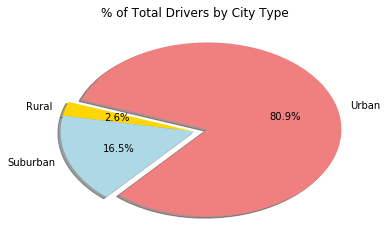

In [7]:
# Reset the index of driver df to group again by city type then get the total drivers
total_driver = driver_count.reset_index()
total_driver = total_driver.groupby('type')['driver count'].sum()
plt.pie(total_driver, labels = labels, colors= colors, autopct='%0.1f%%', explode= explode, shadow= True, startangle=160)
plt.title("% of Total Drivers by City Type")
plt.show()

## OBSERVATIONS:
Three key observable trends for Pyber are as below.
1) Average fare Per Ride is less in Urban Areas than Suburban/Rural Area. 

2) All three analyses of data, clearly indicate that the polularity of ride sharing is on upward trend in urban area. One of main reason would be higher population in the Urban Area.

3) If Pyber Inc. invests more in Suburban Areas, it would result in better margin for the company. This is basically due to higher profit margins in Suburban Areas.
